In [248]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

In [191]:
adnimerge = pd.read_csv("Imp_Files/ADNIMERGE_07Jan2024.csv")
ICV_info = adnimerge[['VISCODE','ICV','RID']]

C:\Users\anisr\AppData\Local\Temp\ipykernel_16612\879423613.py:1: DtypeWarning: Columns (19,20,21,50,51,104,105,106) have mixed types. Specify dtype option on import or set low_memory=False.
  adnimerge = pd.read_csv("Imp_Files/ADNIMERGE_07Jan2024.csv")


In [192]:
sleep_data = pd.read_csv('Longitudinal sleep.csv')
volumes_data = pd.read_csv('Volumes_merge.csv')

In [193]:
volumes_data = volumes_data.drop(['Month', 'Years_bl','AGE'],axis=1)
sleep_data.rename(columns={"VISCODE2": "VISCODE"}, inplace=True)

In [194]:
cognitive_outcomes = ['ADNI_MEM', 'ADNI_EF', 'ADNI_LAN', 'ADNI_VS', 'ADNI_EF2']
sleep_vars = ['NPIK', 'NPIKSEV', 'Sleep_Apnea', 'Restless_Legs',
              'Insomnia', 'Sleep_Disturbance_Other', 'Sleep_Quality']
mri_vars = ['Brainstem', 'CorpusCallosumAnterior', 'CorpusCallosumCentral', 'CorpusCallosumMidAnterior', 'CorpusCallosumMidPosterior', 'CorpusCallosumPosterior', 'Csf', 'RightParacentral', 'RightParahippocampal', 'RightParsOpercularis', 'RightParsOrbitalis', 'RightParsTriangularis', 'RightPericalcarine', 'RightPostcentral', 'RightPosteriorCingulate', 'RightPrecentral', 'RightPrecuneus', 'RightRostralAnteriorCingulate', 'RightRostralMiddleFrontal', 'RightSuperiorFrontal', 'RightSuperiorParietal', 'RightSuperiorTemporal', 'RightSupramarginal', 'RightTemporalPole', 'RightTransverseTemporal', 'RightUnknown', 'LeftInsula', 'RightInsula', 'LeftBankssts', 'LeftCaudalAnteriorCingulate', 'LeftCaudalMiddleFrontal', 'LeftCuneus', 'LeftEntorhinal', 'LeftFrontalPole', 'LeftFusiform', 'LeftInferiorParietal', 'LeftInferiorTemporal', 'LeftIsthmusCingulate', 'LeftLateralOccipital', 'LeftLateralOrbitofrontal', 'LeftLingual', 'LeftMedialOrbitofrontal', 'LeftMiddleTemporal', 'LeftParacentral', 'LeftParahippocampal', 'LeftParsOpercularis', 'LeftParsOrbitalis', 'LeftParsTriangularis', 'LeftPericalcarine', 'LeftPostcentral', 'LeftPosteriorCingulate', 'LeftPrecentral', 'LeftPrecuneus', 'LeftRostralAnteriorCingulate', 'LeftRostralMiddleFrontal',
            'LeftSuperiorFrontal', 'LeftSuperiorParietal', 'LeftSuperiorTemporal', 'LeftSupramarginal', 'LeftTemporalPole', 'LeftTransverseTemporal', 'LeftUnknown', 'RightBankssts', 'RightCaudalAnteriorCingulate', 'RightCaudalMiddleFrontal', 'RightCuneus', 'RightEntorhinal', 'RightFrontalPole', 'RightFusiform', 'RightInferiorParietal', 'RightInferiorTemporal', 'RightIsthmusCingulate', 'RightLateralOccipital', 'RightLateralOrbitofrontal', 'RightLingual', 'RightMedialOrbitofrontal', 'RightMiddleTemporal', 'FourthVentricle', 'Icv', 'LeftAccumbensArea', 'LeftAmygdala', 'LeftCaudate', 'LeftCerebellumCortex', 'LeftCerebellumWM', 'LeftCerebralCortex', 'LeftCerebralWM', 'LeftChoroidPlexus', 'LeftHemisphere', 'LeftHippocampus', 'LeftInferiorLateralVentricle', 'LeftLateralVentricle', 'LeftPallidum', 'LeftPutamen', 'LeftThalamus', 'LeftVentralDC', 'LeftVessel', 'NonWMHypoIntensities', 'OpticChiasm', 'RightAccumbensArea', 'RightAmygdala', 'RightCaudate', 'RightCerebellumCortex', 'RightCerebellumWM', 'RightCerebralCortex', 'RightCerebralWM', 'RightChoroidPlexus', 'RightHemisphere', 'RightHippocampus', 'RightInferiorLateralVentricle', 'RightLateralVentricle', 'RightPallidum', 'RightPutamen', 'RightThalamus', 'RightVentralDC', 'ThirdVentricle', 'WMHypoIntensities']

In [195]:
volumes_data = pd.merge(volumes_data, ICV_info, on = ['RID','VISCODE'])

In [196]:
continuous_vars = cognitive_outcomes + mri_vars
constant_vars = ['ICV', 'PTGENDER', 'Adjusted_Age','PTEDUCAT']

In [197]:
volumes_data.columns[volumes_data.isnull().any()]


Index(['DX', 'ADNI_MEM', 'ADNI_EF', 'ADNI_VS', 'ADNI_LAN', 'ADNI_EF2'], dtype='object')

In [198]:
volumes_data.at[1819, 'DX'] = 'Dementia'

In [199]:
volumes_data.fillna(method='ffill', inplace=True)

In [200]:
from sklearn.preprocessing import LabelEncoder

categorical_columns_sleep = ['Sleep_Quality','VISCODE']

label_encoders = {}

for column in volumes_data.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    volumes_data[column] = le.fit_transform(volumes_data[column].astype(str))
    label_encoders[column] = le

for column in categorical_columns_sleep:
    le = LabelEncoder()
    sleep_data[column] = le.fit_transform(sleep_data[column].astype(str))
    label_encoders[column] = le

In [201]:
sleep_data['NPIKSEV'].value_counts()

-4.0    1756
 1.0     217
 2.0      94
 3.0      21
Name: NPIKSEV, dtype: int64

In [202]:
sleep_data['NPIKSEV'].replace(-4.0, 0,inplace=True)

In [203]:
corr_results_volumes = []

for cont_var in continuous_vars:
    for const_var in constant_vars:
        valid_data = volumes_data[[cont_var, const_var]].dropna()
        if not valid_data.empty:  
            corr, p_val = pearsonr(valid_data[cont_var], valid_data[const_var])
            corr_results_volumes.append({
                'Dataset': 'Volumes',
                'Continuous_Variable': cont_var,
                'Constant_Variable': const_var,
                'Correlation': corr,
                'P_Value': p_val
            })

corr_df_volumes = pd.DataFrame(corr_results_volumes)

In [204]:
corr_results_sleep = []
for sleep_var in sleep_vars:
    for const_var in constant_vars:
        corr, p_val = pearsonr(
            sleep_data[sleep_var], volumes_data[const_var])
        corr_results_sleep.append({
            'Dataset': 'Sleep',
            'Continuous_Variable': sleep_var,
            'Constant_Variable': const_var,
            'Correlation': corr,
            'P_Value': p_val
        })

corr_df_sleep = pd.DataFrame(corr_results_sleep)

In [205]:
corr_df_combined = pd.concat([corr_df_volumes, corr_df_sleep], ignore_index=True)

In [206]:
from statsmodels.stats.multitest import multipletests

corr_df_combined['FDR_P_Value'] = multipletests(
    corr_df_combined['P_Value'], method='fdr_bh')[1]

In [207]:
corr_df_combined['FWER_P_Value'] = multipletests(
    corr_df_combined['P_Value'], method='bonferroni')[1]

In [208]:
corr_df_combined.sort_values(by='FDR_P_Value', ascending=True)

,Dataset,Continuous_Variable,Constant_Variable,Correlation,P_Value,FDR_P_Value,FWER_P_Value
360,Volumes,LeftCerebralWM,ICV,0.719855,0.000000,0.000000,0.0
332,Volumes,Icv,ICV,0.999975,0.000000,0.000000,0.0
368,Volumes,LeftHemisphere,ICV,0.851524,0.000000,0.000000,0.0
436,Volumes,RightCerebralWM,ICV,0.727570,0.000000,0.000000,0.0
444,Volumes,RightHemisphere,ICV,0.857177,0.000000,0.000000,0.0
...,...,...,...,...,...,...,...
195,Volumes,LeftParacentral,PTEDUCAT,0.003329,0.879173,0.886096,1.0
490,Sleep,NPIKSEV,Adjusted_Age,0.002206,0.919758,0.925179,1.0
155,Volumes,LeftFrontalPole,PTEDUCAT,-0.000856,0.968834,0.972634,1.0
485,Sleep,NPIK,PTGENDER,-0.000684,0.975070,0.976978,1.0


In [209]:
corr_df_combined[corr_df_combined['FDR_P_Value'] < 0.05]

,Dataset,Continuous_Variable,Constant_Variable,Correlation,P_Value,FDR_P_Value,FWER_P_Value
0,Volumes,ADNI_MEM,ICV,-0.096246,1.055212e-05,1.504926e-05,5.402684e-03
1,Volumes,ADNI_MEM,PTGENDER,-0.096763,9.453817e-06,1.352054e-05,4.840354e-03
3,Volumes,ADNI_MEM,PTEDUCAT,0.160559,1.580090e-13,3.029985e-13,8.090059e-11
4,Volumes,ADNI_EF,ICV,-0.060831,5.426797e-03,6.631313e-03,1.000000e+00
5,Volumes,ADNI_EF,PTGENDER,-0.049583,2.346875e-02,2.706306e-02,1.000000e+00
...,...,...,...,...,...,...,...
502,Sleep,Insomnia,Adjusted_Age,0.052482,1.646915e-02,1.929567e-02,1.000000e+00
503,Sleep,Insomnia,PTEDUCAT,-0.072436,9.253301e-04,1.184422e-03,4.737690e-01
506,Sleep,Sleep_Disturbance_Other,Adjusted_Age,0.060610,5.598063e-03,6.824306e-03,1.000000e+00
510,Sleep,Sleep_Quality,Adjusted_Age,-0.055442,1.128175e-02,1.352754e-02,1.000000e+00


In [210]:
corr_df_combined[corr_df_combined['FWER_P_Value'] < 0.05]

,Dataset,Continuous_Variable,Constant_Variable,Correlation,P_Value,FDR_P_Value,FWER_P_Value
0,Volumes,ADNI_MEM,ICV,-0.096246,1.055212e-05,1.504926e-05,5.402684e-03
1,Volumes,ADNI_MEM,PTGENDER,-0.096763,9.453817e-06,1.352054e-05,4.840354e-03
3,Volumes,ADNI_MEM,PTEDUCAT,0.160559,1.580090e-13,3.029985e-13,8.090059e-11
6,Volumes,ADNI_EF,Adjusted_Age,-0.087635,6.078065e-05,8.298585e-05,3.111969e-02
7,Volumes,ADNI_EF,PTEDUCAT,0.223832,4.037161e-25,9.937626e-25,2.067026e-22
...,...,...,...,...,...,...,...
480,Volumes,WMHypoIntensities,ICV,0.308521,2.772331e-47,1.006690e-46,1.419434e-44
481,Volumes,WMHypoIntensities,PTGENDER,0.117552,7.165900e-08,1.157395e-07,3.668941e-05
482,Volumes,WMHypoIntensities,Adjusted_Age,0.289872,1.052231e-41,3.567828e-41,5.387420e-39
500,Sleep,Insomnia,ICV,-0.107196,9.130639e-07,1.362941e-06,4.674887e-04


In [211]:
fdr_significant_df = corr_df_combined[corr_df_combined['FDR_P_Value'] < 0.05]
fwer_significant_df = corr_df_combined[corr_df_combined['FWER_P_Value'] < 0.05]
fdr_significant_df.to_csv('supplementary_tables/FDR_Significant_Features.csv', index=False)
fwer_significant_df.to_csv('supplementary_tables/FWER_Significant_Features.csv', index=False)

In [212]:
volumes_data.to_csv('Updated_merge.csv', index=False)
sleep_data.to_csv('Updated_sleep.csv', index=False)

In [213]:
volumes_data['ICV'].mean()

1568318.1417624522

In [214]:
(volumes_data['ICV'] > volumes_data['ICV'].mean()).sum()

1004

In [215]:
volumes_data_norm = volumes_data.copy()

high_icv_threshold = volumes_data_norm['ICV'].mean()
volumes_data_norm['High_ICV'] = volumes_data_norm['ICV'] > high_icv_threshold

mri_vars_adjusted = [var for var in mri_vars if var != 'ICV']

for var in mri_vars_adjusted:
    volumes_data_norm[f'{var}_norm'] = volumes_data_norm[var] / \
        volumes_data_norm['ICV']
volumes_data_norm.drop(columns=mri_vars_adjusted, inplace=True)

C:\Users\anisr\AppData\Local\Temp\ipykernel_16612\2757077334.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  volumes_data_norm[f'{var}_norm'] = volumes_data_norm[var] / \
C:\Users\anisr\AppData\Local\Temp\ipykernel_16612\2757077334.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  volumes_data_norm[f'{var}_norm'] = volumes_data_norm[var] / \
C:\Users\anisr\AppData\Local\Temp\ipykernel_16612\2757077334.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times,

In [216]:
volumes_data_norm.to_csv("supplementary_tables/Volumes_norm_ICV.csv", index=False)

In [221]:
merge_norm = pd.merge(volumes_data_norm, sleep_data, on=['RID', 'VISCODE'])

In [222]:
constant_vars = ['ICV', 'PTGENDER', 'Adjusted_Age', 'PTEDUCAT']
continuous_vars = cognitive_outcomes + sleep_vars + \
    [var for var in volumes_data_norm.columns if '_norm' in var]

correlation_results = []

for const_var in constant_vars:
    for cont_var in continuous_vars:
        valid_data = merge_norm[[const_var, cont_var]].dropna()

        if len(valid_data) > 0:
            corr_value, p_value = pearsonr(
                valid_data[const_var], valid_data[cont_var])

            correlation_results.append({
                'Constant_Var': const_var,
                'Continuous_Var': cont_var,
                'Correlation': corr_value,
                'P_Value': p_value
            })

correlation_results_df = pd.DataFrame(correlation_results)

In [224]:
correlation_results_df[
    (correlation_results_df['P_Value'] < 0.05) & (
        correlation_results_df['Correlation'].abs() >= 0.3)
]

,Constant_Var,Continuous_Var,Correlation,P_Value
12,ICV,Brainstem_norm,-0.341836,2.629554e-58
14,ICV,CorpusCallosumCentral_norm,-0.391197,2.583915e-77
15,ICV,CorpusCallosumMidAnterior_norm,-0.326109,6.256981e-53
17,ICV,CorpusCallosumPosterior_norm,-0.335544,4.061882e-56
20,ICV,RightParahippocampal_norm,-0.346377,6.434084e-60
27,ICV,RightPrecentral_norm,-0.305125,3.088152e-46
35,ICV,RightTemporalPole_norm,-0.359112,1.395170e-64
38,ICV,LeftInsula_norm,-0.312406,1.690667e-48
51,ICV,LeftLateralOrbitofrontal_norm,-0.367082,1.304463e-67
53,ICV,LeftMedialOrbitofrontal_norm,-0.341519,3.399302e-58


In [228]:
correlation_results_df[correlation_results_df['Constant_Var'] == 'ICV'].sort_values(
    by='Correlation', ascending=False).to_csv('supplementary_tables/ICV_Correlation.csv', index=False)

In [229]:
correlation_results_df[correlation_results_df['Constant_Var'].isin(
    ['PTGENDER', 'Adjusted_Age', 'PTEDUCAT'])].to_csv('supplementary_tables/Constant_Correlation.csv', index=False)

In [238]:
mri_vars = volumes_data_norm.filter(like='_norm').columns.tolist()

In [239]:
continuous_vars = cognitive_outcomes + sleep_vars + mri_vars
constant_vars = ['ICV', 'PTGENDER', 'Adjusted_Age', 'PTEDUCAT']
random_effects_var = 'RID'

In [240]:
lmm_results = []

for outcome in continuous_vars:
    try:
        formula = f"{outcome} ~ {' + '.join(constant_vars)}"
        model = smf.mixedlm(formula, merge_norm,
                            groups=merge_norm[random_effects_var]).fit()

        for feature in constant_vars:
            lmm_results.append({
                'Outcome': outcome,
                'Feature': feature,
                'Coefficient': model.params[feature],
                'P-Value': model.pvalues[feature],
                'R-Squared': model.rsquared if hasattr(model, 'rsquared') else np.nan
            })
    except Exception as e:
        print(f"Error fitting model for {outcome}: {e}")

c:\Users\anisr\anaconda3\envs\research\lib\site-packages\statsmodels\regression\mixed_linear_model.py:2238: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)
c:\Users\anisr\anaconda3\envs\research\lib\site-packages\statsmodels\regression\mixed_linear_model.py:2238: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)
c:\Users\anisr\anaconda3\envs\research\lib\site-packages\statsmodels\regression\mixed_linear_model.py:2238: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)
c:\Users\anisr\anaconda3\envs\research\lib\site-packages\statsmodels\regression\mixed_linear_model.py:2238: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)
c:\Users\anisr\anaconda3\envs\research\lib\site-packages\statsmodels\regression\mixed_linear_model.py:22

In [247]:
lmm_results_df = pd.DataFrame(lmm_results).drop(columns=['R-Squared'])

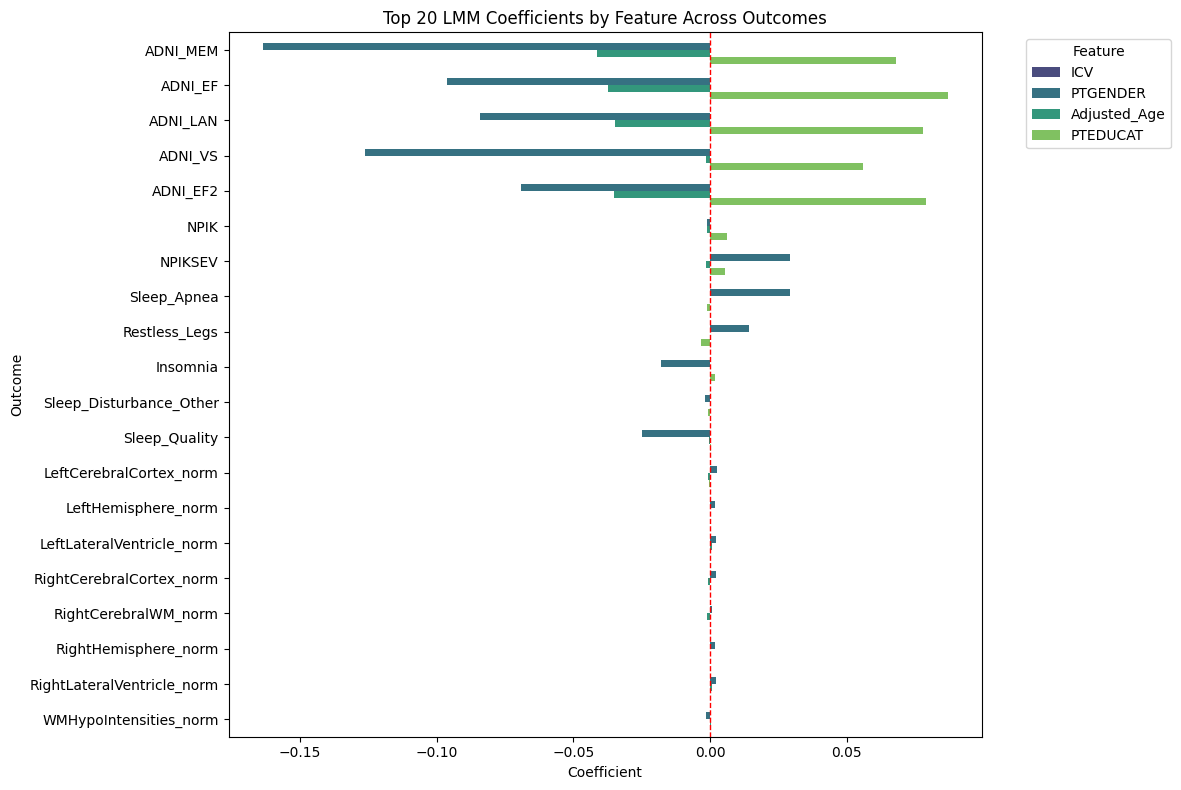

<Figure size 640x480 with 0 Axes>

In [346]:
top_20_outcomes = lmm_results_df.groupby('Outcome')['Coefficient'].apply(lambda x: x.abs().max()).nlargest(20).index
filtered_df = lmm_results_df[lmm_results_df['Outcome'].isin(top_20_outcomes)]

plt.figure(figsize=(12, 8))
sns.barplot(data=filtered_df, x='Coefficient', y='Outcome', hue='Feature', palette='viridis')
plt.title('Top 20 LMM Coefficients by Feature Across Outcomes')
plt.xlabel('Coefficient')
plt.ylabel('Outcome')
plt.axvline(x=0, color='red', linestyle='--', linewidth=1)
plt.legend(title='Feature', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()
plt.savefig('supplementary_tables/Top_20_LMM_Coefficients.png', bbox_inches='tight')

In [260]:
def plot_top_20_coefficients(lmm_results_df):
    constant_vars = lmm_results_df['Feature'].unique()

    for feature in constant_vars:
        feature_df = lmm_results_df[lmm_results_df['Feature'] == feature]
        top_20_coeff = feature_df.nlargest(20, 'Coefficient')

        plt.figure(figsize=(12, 8))
        sns.barplot(
            x='Coefficient', y='Outcome', data=top_20_coeff, palette='viridis'
        )
        plt.title(f'Top 20 Outcomes by Coefficient for {feature}')
        plt.xlabel('Coefficient')
        plt.ylabel('Outcome')
        plt.tight_layout()
        plt.savefig(f'supplementary_tables/LMM_Top_Coefficients_{feature}.png')
        plt.close()

In [261]:
plot_top_20_coefficients(lmm_results_df)

C:\Users\anisr\AppData\Local\Temp\ipykernel_16612\463694395.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\anisr\AppData\Local\Temp\ipykernel_16612\463694395.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\anisr\AppData\Local\Temp\ipykernel_16612\463694395.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\anisr\AppData\Local\Temp\ipykernel_16612\463694395.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and 

In [ ]:
def plot_top_20_pvalues(lmm_results_df):
    constant_vars = lmm_results_df['Feature'].unique()

    for feature in constant_vars:
        feature_df = lmm_results_df[lmm_results_df['Feature'] == feature]
        top_20_pvalues = feature_df.nsmallest(20, 'P-Value')

        plt.figure(figsize=(12, 8))
        sns.barplot(
            x='P-Value', y='Outcome', data=top_20_pvalues, palette='coolwarm_r'
        )
        plt.title(f'Top 20 Significant Outcomes by P-Value for {feature}')
        plt.xlabel('P-Value')
        plt.ylabel('Outcome')
        plt.tight_layout()
        plt.savefig(f'LMM_Top_PValues_{feature}.png')
        plt.close()

In [263]:
plot_top_20_pvalues(lmm_results_df)

C:\Users\anisr\AppData\Local\Temp\ipykernel_16612\3964652686.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\anisr\AppData\Local\Temp\ipykernel_16612\3964652686.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\anisr\AppData\Local\Temp\ipykernel_16612\3964652686.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\anisr\AppData\Local\Temp\ipykernel_16612\3964652686.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `h

In [267]:
from fuzzywuzzy import fuzz, process
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

c:\Users\anisr\anaconda3\envs\research\lib\site-packages\fuzzywuzzy\fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [286]:
sleep_data_mh = pd.read_csv('Imp_Files/RECMHIST_25Aug2023.csv')

In [288]:
sleep_data_mh['MHDESC'] = sleep_data_mh['MHDESC'].fillna(
    'Unknown').str.strip().str.lower()
mhdesc_data_ = sleep_data_mh[['RID', 'VISCODE', 'MHDESC']
                         ].drop_duplicates().reset_index(drop=True)

In [289]:
mhdesc_data_

,RID,VISCODE,MHDESC
0,2,sc,--/--/1984 pancreatitis
1,2,sc,"--/--/2001 non insulin dependent diabetes, die..."
2,2,sc,--/--/1993 cataracts removed from both eyes
3,1,f,"astigmatism ou since 1950, corrective lenses w..."
4,1,f,hepatitis a 1990
...,...,...,...
30597,363,v06,bilateral cataract extraction
30598,363,v06,constipation
30599,363,v06,word finding difficulty
30600,363,v06,short-term memory decline


In [290]:
keyword_groups = {
    "Sleep_Apnea": ["sleep apnea", "obstructive sleep apnea", "cpap", "apnea"],
    "Restless_Legs": ["restless legs", "restless leg syndrome", "rls"],
    "Insomnia": ["insomnia", "difficulty falling asleep", "trouble sleeping"],
    "Sleep_Disturbance_Other": ["circadian disorder", "sleep disturbance", "hypersomnia", "parasomnia"]
}

all_keywords = [kw for group in keyword_groups.values() for kw in group]

In [327]:
from fuzzywuzzy import fuzz, process


def fuzzy_match_with_groups(mhdesc_data, keyword_groups, threshold=60):
    matched_results = [] 

    for index, row in mhdesc_data.iterrows():
        desc = str(row['MHDESC']).lower().strip()
        best_match = None
        best_score = 0
        best_group = "No Sleep" 

        for group_name, keywords in keyword_groups.items():
            match, score = process.extractOne(
                desc, keywords, scorer=fuzz.token_sort_ratio)

            if match and score > best_score and score >= threshold:
                best_match = match
                best_score = score
                best_group = group_name

        matched_results.append({
            "RID": row['RID'],
            "VISCODE": row['VISCODE'],
            "MHDESC": row['MHDESC'],
            "Matched_Group": best_group,
            "Matched_Term": best_match if best_match else "No Match",
            "Score": best_score
        })

    matched_df = pd.DataFrame(matched_results)
    return matched_df

In [328]:
matched_ = fuzzy_match_with_groups(
    mhdesc_data_, keyword_groups, threshold=60)

Applied processor reduces input query to empty string, all comparisons will have score 0. [Query: '--']
Applied processor reduces input query to empty string, all comparisons will have score 0. [Query: '--']
Applied processor reduces input query to empty string, all comparisons will have score 0. [Query: '--']
Applied processor reduces input query to empty string, all comparisons will have score 0. [Query: '--']


In [329]:
matched_terms_df = matched_[matched_['RID'].isin(sleep_data['RID'])].sort_values(by='Score', ascending=False)


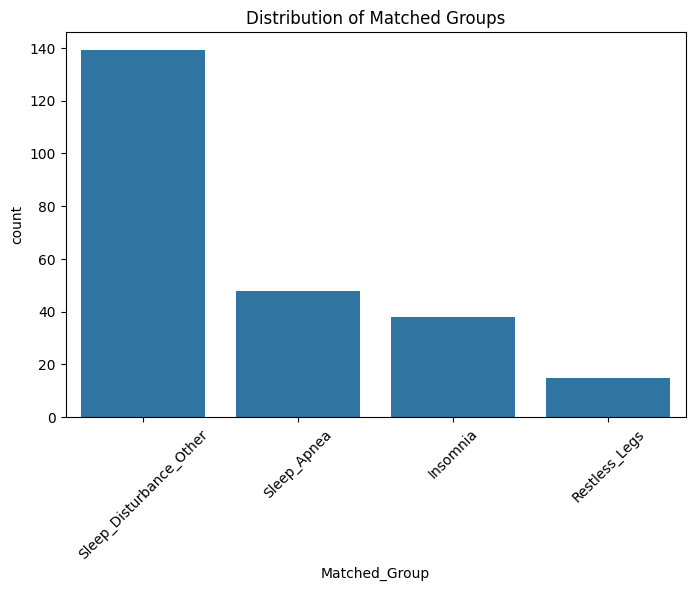

In [330]:
plt.figure(figsize=(8, 5))
filtered_df = matched_terms_df[matched_terms_df['Matched_Group'] != 'No Sleep']
sns.countplot(x='Matched_Group', data=filtered_df,
              order=filtered_df['Matched_Group'].value_counts().index)
plt.title('Distribution of Matched Groups')
plt.xticks(rotation=45)
plt.show()

In [331]:
matched_binary_df = matched_terms_df.copy()

groups = ["Sleep_Apnea", "Restless_Legs",
          "Insomnia", "Sleep_Disturbance_Other"]

for group in groups:
    matched_binary_df[group] = 0

for group in groups:
    matched_binary_df.loc[matched_binary_df['Matched_Group']
                          == group, group] = 1

In [332]:
matched_binary_df['RID'].nunique()

522

In [333]:
matched_binary_df['VISCODE'].value_counts()

sc     4603
v06    2910
m48    1369
m60     650
m36      45
Name: VISCODE, dtype: int64

In [338]:
def clean_rid_duplicates(df):
    final_rows = []

    for rid, group in df.groupby('RID'):
        matched_rows = group[group['Matched_Group'] != 'No Sleep']

        if not matched_rows.empty:
            final_rows.append(matched_rows.iloc[0])
        else:
            final_rows.append(group.iloc[0])
    cleaned_df = pd.DataFrame(final_rows).reset_index(drop=True)

    return cleaned_df

In [339]:
matched_binary_cleaned_df = clean_rid_duplicates(matched_binary_df)

In [340]:
matched_binary_cleaned_df

,RID,VISCODE,MHDESC,Matched_Group,Matched_Term,Score,Sleep_Apnea,Restless_Legs,Insomnia,Sleep_Disturbance_Other
0,3,sc,1995-hypertension; 1995-hyperlipidemia,No Sleep,No Match,0,0,0,0,0
1,5,sc,1941-rosacea,No Sleep,No Match,0,0,0,0,0
2,10,sc,2004- depressive symptoms,No Sleep,No Match,0,0,0,0,0
3,14,sc,depression in 1988. treated with antidepressan...,No Sleep,No Match,0,0,0,0,0
4,16,sc,2004 high cholesterol,No Sleep,No Match,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
517,1414,m36,one squamous cell carcinoma on face removed pr...,No Sleep,No Match,0,0,0,0,0
518,1418,v06,hypertension,Sleep_Disturbance_Other,hypersomnia,61,0,0,0,1
519,1419,m36,"l knee surgery, 1992",No Sleep,No Match,0,0,0,0,0
520,1425,v06,hypertension,Sleep_Disturbance_Other,hypersomnia,61,0,0,0,1


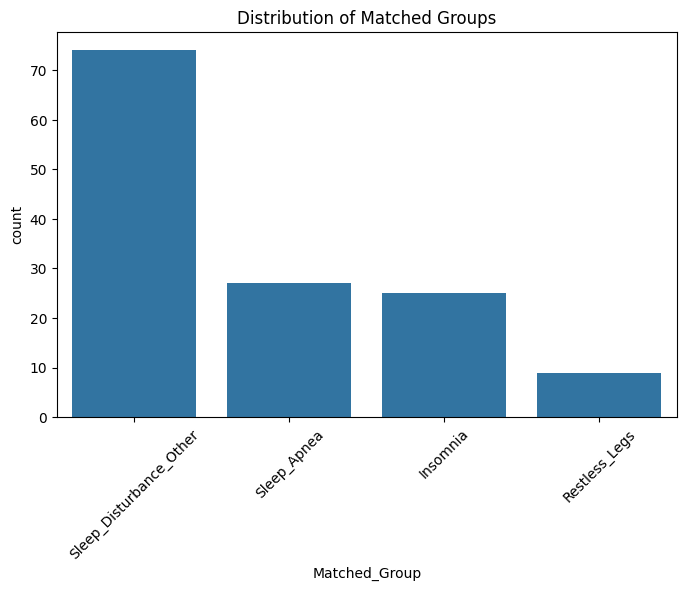

In [343]:
plt.figure(figsize=(8, 5))
filtered_df = matched_binary_cleaned_df[matched_binary_cleaned_df['Matched_Group'] != 'No Sleep']
sns.countplot(x='Matched_Group', data=filtered_df,
              order=filtered_df['Matched_Group'].value_counts().index)
plt.title('Distribution of Matched Groups')
plt.xticks(rotation=45)
plt.show()

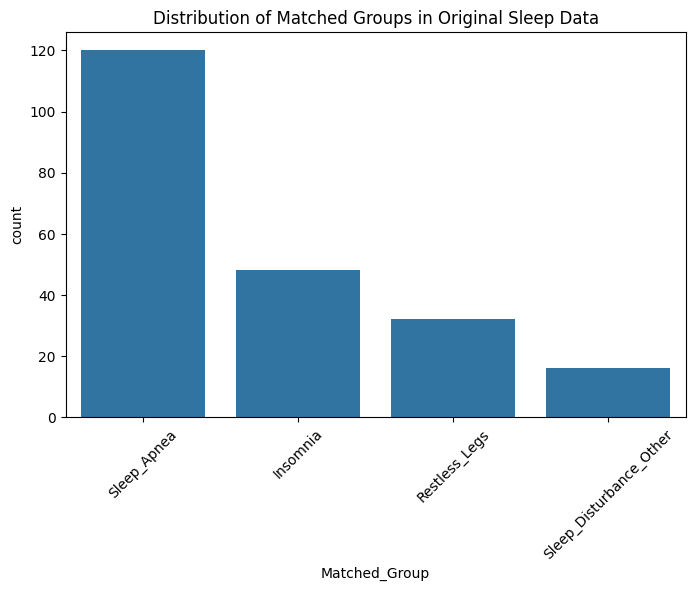

In [ ]:
sleep_groups = ['Sleep_Apnea', 'Restless_Legs',
                'Insomnia', 'Sleep_Disturbance_Other']

melted_sleep_df = sleep_data[['RID', 'VISCODE'] + sleep_groups].melt(
    id_vars=['RID', 'VISCODE'],
    value_vars=sleep_groups,
    var_name='Matched_Group',
    value_name='Presence'
)
matched_sleep_df = melted_sleep_df[melted_sleep_df['Presence'] == 1]
plt.figure(figsize=(8, 5))
sns.countplot(x='Matched_Group', data=matched_sleep_df,
              order=matched_sleep_df['Matched_Group'].value_counts().index)
plt.title('Distribution of Matched Groups in Original Sleep Data')
plt.xticks(rotation=45)
plt.show()